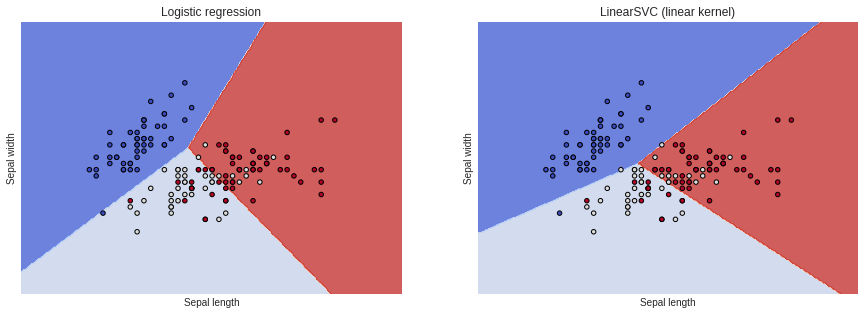

In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt

#%%
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-darkgrid')
# %%

# Load data from file.
iris = load_iris() 
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = (LogisticRegression(), LinearSVC(max_iter=10000))
models = [clf.fit(X_train, y_train) for clf in models]

titles = ('Logistic regression', 'LinearSVC (linear kernel)')

#%%
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#%%

fig, sub = plt.subplots(1, 2, figsize=(15,5))

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()



$三分类问题的混淆矩阵:$
\begin{pmatrix}
T0&F0&F0 \\
F1&T1&F1 \\
F2&F2&T2 \\
\end{pmatrix}$
$acc(准确率) = \frac{T}{T+F}, T=TP+TN , F=FP+FN \\
precision(查准率) = \frac{TP}{TP+FP} \\
TPR(召回率recall) =\frac{TP}{TP+FN} \\
FPR = \frac{FP}{FP+TN} \\
specificity(特异性) = \frac{TN}{FP+TN} \\
$




In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = [clf.predict(X_test) for clf in models]
for title, result in zip(titles, results):
    print(title)
    print(f'acc_score = {accuracy_score(y_test, result)}')
    print(f'confusion_matrix = \n{confusion_matrix(y_test, result)}')
    print(classification_report(y_test, result))


Logistic regression
acc_score = 0.8222222222222222
confusion_matrix = 
[[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45

LinearSVC (linear kernel)
acc_score = 0.7777777777777778
confusion_matrix = 
[[19  0  0]
 [ 1  5  7]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.71      0.38      0.50        13
           2       0.61      0.85      0.71        13

    accuracy                           0.78        45
   macro avg       0.76      0.74      0.73        45
weighted avg       0.78      0.78      0.76        45



In [9]:
print(results[0])
print(y_test)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
